<a href="https://colab.research.google.com/github/upadhyan/STAT-598-Work/blob/main/STAT_598_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import time

# Exercise 1
## Part a)
* By definition tr[$(ABC)$] = tr[$(CAB)$]

* Using this property, we can say that tr[$Axx^T$] = tr[$x^TAx$]

* Since $x^TAx$ is a 1x1 matrix, tr[$x^TAx$] = $x^TAx$

* Therefore [$Axx^T$] = $x^TAx$
## Part b)
* $\prod_{n =1}^{N} \frac{1}{(2\pi)^{d/2}|\Sigma|^\frac{1}{2}} \times $ exp{$ -\frac{1}{2}(x_n-\mu)^T\Sigma^{-1}(x_n - \mu)$} =  $\prod_{n =1}^{N} \frac{1}{(2\pi)^{d/2}|\Sigma|^\frac{1}{2}} \times \prod_{n =1}^{N}$ exp{$ -\frac{1}{2}(x_n-\mu)^T\Sigma^{-1}(x_n - \mu)$}


* $\prod_{n =1}^{N} \frac{1}{(2\pi)^{d/2}|\Sigma|^\frac{1}{2}} = \frac{1}{(2\pi)^{Nd/2}|\Sigma|^{N/2}} = \frac{|\Sigma|^{-N/2}}{(2\pi)^{Nd/2}} = \frac{|\Sigma^{-1}|^{N/2}}{(2\pi)^{Nd/2}}$

* $\prod_{n=1}^N e^{a_n} = e^{a_1}e^{a_2}...e^{a_N} = $ 
exp{$a_1 + a_2 + ... +a_N$} = exp{$\sum_{n=1}^N a_n$}

* $a_n = -\frac{1}{2}(x_n - \mu)^T \Sigma^{-1}(x_n - \mu)$

* $\prod_{n =1}^{N}$ exp{$ -\frac{1}{2}(x_n-\mu)^T\Sigma^{-1}(x_n - \mu) = $ exp{$\sum_{n=1}^N -\frac{1}{2}(x_n - \mu)^T \Sigma^{-1}(x_n - \mu)$}

* $g_x(x_n) = $ tr[$g_x(x_n) $] because $g_x(x_n)$ is a $1 \times 1 $ matrix



* Using the circular property proved in part a) and moving constants outside the summation:

 - tr[$\sum_{n=1}^N -\frac{1}{2}(x_n - \mu)^T \Sigma^{-1}(x_n - \mu)$] = $-\frac{1}{2}$tr[$-\frac{1}{2}\Sigma^{-1}\sum_{n=1}^N (x_n - \mu)^T (x_n - \mu)$] 

* $p(\mathscr{D}| \Sigma) = \frac{|\Sigma^{-1}|^{N/2}}{(2\pi)^{Nd/2}} \times $ exp{$-\frac{1}{2}$tr[$\Sigma^{-1}\sum_{n=1}^N (x_n - \mu)^T (x_n - \mu)$]}

## Part c)

* $\sum_{n=1}^N (x_n - \mu)^T (x_n - \mu) = N\tilde{\Sigma}$

* exp{$-\frac{1}{2}$tr[$\Sigma^{-1}\sum_{n=1}^N (x_n - \mu)^T (x_n - \mu)$]} = exp{$-\frac{N}{2}$tr[$\Sigma^{-1}\tilde{\Sigma}$]} = exp{$-\frac{N}{2}$tr[$A$]} = exp{$-\frac{N}{2}\sum_{i=1}^d \lambda_i$}

* $|\Sigma^{-1}|^{N/2} = |A\tilde{\Sigma}^{-1}|^{N/2} = \frac{1}{|\tilde{\Sigma}|^{N/2}}|A|$

* $|A| = \prod_{i=1}^d \lambda_i$


* $p(\mathscr{D}| \Sigma) = \frac{1}{(2\pi)^{Nd/2}|\tilde{\Sigma}|^{N/2}}\prod_{i=1}^d \lambda_i$exp{$-\frac{N}{2}\sum_{i=1}^d \lambda_i$}

## Part d)
* $\log(p(\mathscr{D}| \Sigma)) = -\frac{Nd}{2}\log(2\pi) - \frac{N}{2}\log(|\tilde{\Sigma}|) + \frac{N}{2}\sum_{i=1}^d \log(\lambda_i) - \frac{N}{2}\sum_{i=1}^d \lambda_i$

* $\frac{\partial}{\partial \lambda_i} \log(p(\mathscr{D}| \Sigma)) = \frac{N}{2}\sum_{i = 1}^d \frac{1}{\lambda_i}-d\frac{N}{2} = 0$

* $\sum_{i = 1}^d \frac{1}{\lambda_i} = d$

* One case that works is that $\lambda_1 = \lambda_2 =...=\lambda_d = 1$. This means $A = I$

## Part e)
* $\hat{\Sigma}_{ML} A = \tilde{\Sigma} $

* $A = I \Rightarrow \hat{\Sigma}_{ML} = \tilde{\Sigma} = \frac{1}{N}\sum_{n=1}^N (x_n -\mu)(x_n - \mu)^T$


## Part f)
Maximize the log-likelihood of this function by creating an optimization problem with $\mu$ and $\Sigma$ as optimization variables. To solve this problem you take the derivatives with respect to $\mu$ and $\Sigma$ and set them to zero, which would give you a system of equations. We solve to find $\hat{\Sigma}_{ML}$.
## Part g)
The unbiased estimator would be:

$\Sigma = \frac{1}{N-1}(x-\hat{\mu})(x-\hat{\mu})^T$


# Exercise 2
## Prep Steps

In [ ]:
train_cat = np.matrix(np.loadtxt('/content/drive/MyDrive/Colab Notebooks/HW3_ECE595/train_cat.txt', delimiter=','))
train_grass = np.matrix(np.loadtxt('/content/drive/MyDrive/Colab Notebooks/HW3_ECE595/train_grass.txt', delimiter=','))
Y = plt.imread('/content/drive/MyDrive/Colab Notebooks/HW3_ECE595/cat_grass.jpg') / 255
truth = plt.imread('/content/drive/MyDrive/Colab Notebooks/HW3_ECE595/truth.png')


## Part a)

* $p_{X|Y}(x|C_n) = c_ne^{g_{x,\mu_n,\Sigma_n}(x)}$

* $c_n = \frac{1}{(2\pi)^{d/2}|\Sigma_n|^{1/2}}$

* $g_{x,\mu_n,\Sigma_n}(x) = -\frac{1}{2}(x-\mu_n)^T\Sigma_n^{-1}(x-\mu_n)$

* $\log(p_{Y|X}(C_1|x)) \gtrless_{C_0}^{C_1}\log(p_{Y|X}(C_0|x)) \Rightarrow \log(p_{X|Y}(x|C_1)) + \log(p_Y(C_1)) \gtrless_{C_0}^{C_1} \log(p_{X|Y}(x|C_0)) + \log(p_Y(C_0))$

* $\log(p_{X|Y}(x|C_n)) + \log(p_Y(C_n)) = \log(c_n) + g_{x,\mu_n,\Sigma_n}(x) + \log(\pi_n) = -\frac{d}{2}\log(2\pi) - \frac{1}{2}|\Sigma_n| + g_{x,\mu_n,\Sigma_n}(x) + \log(\pi_n)$ 

* When put in the inequality, the $-\frac{d}{2}\log(2\pi)$ terms cancel out, leaving us with:
  - $- \frac{1}{2}|\Sigma_1| + g_{x,\mu_1,\Sigma_1}(x) + \log(\pi_1) \gtrless_{C_0}^{C_1} - \frac{1}{2}|\Sigma_0| + g_{x,\mu_0,\Sigma_0}(x) + \log(\pi_0)$

## Part b)

In [ ]:
mu_1 = np.mean(train_cat, axis = 1)
mu_0 = np.mean(train_grass, axis = 1)
print("Mu1")
print(mu_1[0:2])
print("Mu0")
print(mu_0[0:2])

Mu1
[[0.44080734]
 [0.43871359]]
Mu0
[[0.48249575]
 [0.4864399 ]]


In [ ]:
sigma_0 = np.cov(train_grass)
sigma_1 = np.cov(train_cat)

print("Sigma_0")
print(sigma_0[0:2,0:2])
print("Sigma_1")
print(sigma_1[0:2,0:2])

Sigma_0
[[0.064484   0.0369168 ]
 [0.0369168  0.06623457]]
Sigma_1
[[0.04307832 0.03535405]
 [0.03535405 0.0424875 ]]


In [ ]:
K_1 = train_cat.shape[1]
K_0 = train_grass.shape[1]
pi_1 = K_1 / (K_0 + K_1)
pi_0 = K_0 / (K_0 + K_1)
print("Pi0")
print(pi_0)
print("Pi1")
print(pi_1)

Pi0
0.828650711064863
Pi1
0.171349288935137


## Part c)

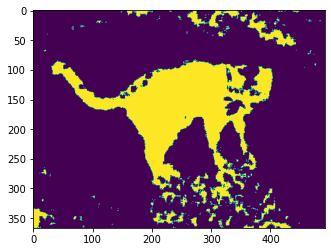

In [ ]:
sigma_0_inv = np.linalg.inv(sigma_0)
sigma_1_inv = np.linalg.inv(sigma_1)
lognorm_s1 = np.log(np.linalg.det(sigma_1))
lognorm_s0 = np.log(np.linalg.det(sigma_0))
sigma_0_inv_m = -.5 * sigma_0_inv
sigma_1_inv_m = -.5 * sigma_1_inv
pi_det_sum_1 = -.5 * lognorm_s1 + np.log(pi_1)
pi_det_sum_0 = -.5 * lognorm_s0 + np.log(pi_0)

M, N = Y.shape
truth = truth[0:M-8, 0:N-8]
prediction = np.zeros((M-8, N-8))
positives = 0
negatives = 0
true_positives = 0
false_positives = 0

for i in range(M-8):
  for j in range(N-8):
    block = Y[i:i+8, j:j+8]
    block = np.reshape(block, (64, 1))
    block_dif1 = block - mu_1
    block_dif0 = block - mu_0 
    a = block_dif1.T @ sigma_1_inv_m @ block_dif1 + pi_det_sum_1
    b = block_dif0.T @ sigma_0_inv_m @ block_dif0 + pi_det_sum_0
    if (a[0][0] > b[0][0]):
      prediction[i][j] = 1
    else:
      prediction[i][j] = 0

false_positives= np.count_nonzero((truth - prediction) == -1)
true_positives = np.count_nonzero((truth + prediction) == 2)
positives = np.count_nonzero(truth == 1)
negatives =np.count_nonzero(truth == 0)
p_d_original = true_positives / positives
p_f_original = false_positives / negatives


plt.imshow(prediction);

In [ ]:
[p_d_original, p_f_original]

[0.8346689721677252, 0.06814805770913457]

## Part d)

In [ ]:
loss = 0
num_pixels = 0
for i in range(M-8):
  for j in range(N-8):
    loss = loss + abs(truth[i,j] - prediction[i,j])
    num_pixels += 1
MAE = loss / num_pixels
MAE

0.09109491785400918

## Part e)

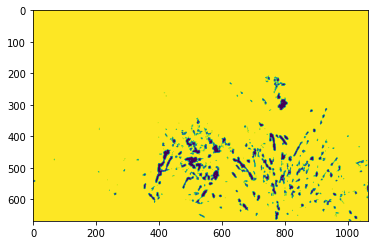

In [ ]:
Y2 = plt.imread('/content/drive/MyDrive/Colab Notebooks/HW3_ECE595/image.jpg') / 255
Y2 = Y2[:,:,0]
M, N = Y2.shape
prediction = np.zeros((M-8, N-8))

for i in range(M-8):
  for j in range(N-8):
    block = Y2[i:i+8, j:j+8]
    block = np.reshape(block, (64, 1))
    block_dif1 = block - mu_1
    block_dif0 = block - mu_0 
    a = -.5 * block_dif1.T @ sigma_1_inv @ block_dif1 + np.log(pi_1) - .5 * lognorm_s1 
    b = -.5 * block_dif0.T @ sigma_0_inv @ block_dif0 + np.log(pi_0) - .5 * lognorm_s0
    if (a[0][0] > b[0][0]):
      prediction[i][j] = 1
    else:
      prediction[i][j] = 0 
plt.imshow(prediction)

This does not perform well. I think it is primarily because:

* This picture is darker compared to the picture we trained our classifier with 

*  The angle of the cat is different compared to the previous picture, which could cause lighting changes.

# Exercise 3
## Part a)
* $p_{Y|X}(C_1|x) \gtrless_{C_0}^{C_1} p_{Y|X}(C_0|x)$

* $p_{X|Y}(x|C_1)p_Y(C_1) \gtrless_{C_0}^{C_1} p_{X|Y}(x|C_0)p_Y(C_0)$

* $\frac{p_{X|Y}(x|C_1)}{p_{X|Y}(x|C_0)}\gtrless_{C_0}^{C_1}  \frac{p_Y(C_0)}{p_Y(C_1)} = \frac{\pi_0}{\pi_1} = \tau$
## Part b) and c)

In [ ]:
M, N = Y.shape
prediction = np.zeros((M-8, N-8))
p = np.zeros((M-8, N-8))
p_d = np.zeros(200)
p_f = np.zeros(200)

for i in range(M-8):
  for j in range(N-8):
    block = Y[i:i+8, j:j+8]
    block = np.reshape(block, (64, 1))
    block_dif1 = block - mu_1
    block_dif0 = block - mu_0 
    a = -.5 * block_dif1.T @ sigma_1_inv @ block_dif1 + -.5 * lognorm_s1 
    b = -.5 * block_dif0.T @ sigma_0_inv @ block_dif0 + -.5 * lognorm_s0
    p[i][j] = a - b

In [ ]:
num = 200
tau_val = np.linspace(-200,100, num)
for v in range(num):
  t = tau_val[v]
  prediction = np.where(p > t, 1, 0)
  false_positives= np.count_nonzero((truth - prediction) == -1)
  true_positives = np.count_nonzero((truth + prediction) == 2)
  positives = np.count_nonzero(truth == 1)
  negatives =np.count_nonzero(truth == 0)
  p_d[v] = true_positives / positives
  p_f[v] = false_positives / negatives

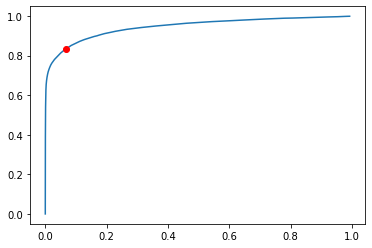

In [ ]:
plt.plot(p_f, p_d);
plt.plot(p_f_original,p_d_original,'ro');
plt.show()

## Part d)
### i) Creating the classifier

In [ ]:
K_1 = train_cat.shape[1]
K_0 = train_grass.shape[1]
X_1 = train_cat.T
X_0 = train_grass.T
A = np.vstack([X_1, X_0])
b = np.vstack([ np.ones((K_1, 1)), -1 * np.ones((K_0, 1)) ])
theta = cvx.Variable((64, 1))
objective = cvx.Minimize(cvx.sum_squares(A @ theta - b))
prob = cvx.Problem(objective, [])
prob.solve()
theta = theta.value

### ii) Processing Image

In [ ]:
M, N = Y.shape
prediction = np.zeros((M-8, N-8))
p_lin = np.zeros((M-8, N-8))
p_d_lin = np.zeros(num)
p_f_lin = np.zeros(num)

for i in range(M-8):
  for j in range(N-8):
    block = Y[i:i+8, j:j+8]
    x = np.reshape(block, (64, 1))
    p_lin[i][j] = (theta.T @ x)[0][0]

In [ ]:
num = 200
tau_val = np.linspace(-1.3,-.1, num)
for v in range(num):
  t = tau_val[v]
  prediction = np.where(p_lin > t, 1, 0)
  false_positives= np.count_nonzero((truth - prediction) == -1)
  true_positives = np.count_nonzero((truth + prediction) == 2)
  positives = np.count_nonzero(truth == 1)
  negatives =np.count_nonzero(truth == 0)
  p_d_lin[v] = true_positives / positives
  p_f_lin[v] = false_positives / negatives

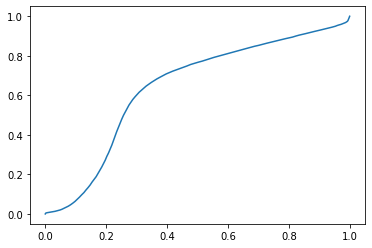

In [ ]:
plt.plot(p_f_lin, p_d_lin);
plt.show()